In [1]:
import model
import numpy as np
import tensorflow as tf
import image_preprocessing
import matplotlib.pyplot as plt

In [2]:
import os
def print_directory_contents(directory):
    try:
        # List all files and directories in the specified directory
        entries = os.listdir(directory)
        print(f"Contents of '{directory}':")
        for entry in entries:
            print(entry)
    except FileNotFoundError:
        print(f"Directory '{directory}' not found.")
    except PermissionError:
        print(f"Permission denied to access '{directory}'.")

print_directory_contents("data/train")

Contents of 'data/train':
Apple___Apple_scab
Apple___Black_rot
Apple___Cedar_apple_rust
Apple___healthy
Blueberry___healthy
Cherry_(including_sour)___healthy
Cherry_(including_sour)___Powdery_mildew
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Corn_(maize)___Common_rust_
Corn_(maize)___healthy
Corn_(maize)___Northern_Leaf_Blight
Grape___Black_rot
Grape___Esca_(Black_Measles)
Grape___healthy
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Orange___Haunglongbing_(Citrus_greening)
Peach___Bacterial_spot
Peach___healthy
Pepper,_bell___Bacterial_spot
Pepper,_bell___healthy
Potato___Early_blight
Potato___healthy
Potato___Late_blight
Raspberry___healthy
Soybean___healthy
Squash___Powdery_mildew
Strawberry___healthy
Strawberry___Leaf_scorch
Tomato___Bacterial_spot
Tomato___Early_blight
Tomato___healthy
Tomato___Late_blight
Tomato___Leaf_Mold
Tomato___Septoria_leaf_spot
Tomato___Spider_mites Two-spotted_spider_mite
Tomato___Target_Spot
Tomato___Tomato_mosaic_virus
Tomato___Tomato_Yellow_Leaf_C

In [3]:
import importlib
importlib.reload(image_preprocessing)

num_samples = 3200
input_shape = (128, 128, 3)
batch_size = 32


image_array, labels, label_encoder = image_preprocessing.create_numpy_dataset("data/train")


print(image_array.shape)
print(labels.shape)

Classes: ['Apple___Apple_scab' 'Apple___Black_rot' 'Apple___Cedar_apple_rust'
 'Apple___healthy' 'Blueberry___healthy'
 'Cherry_(including_sour)___Powdery_mildew'
 'Cherry_(including_sour)___healthy'
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
 'Corn_(maize)___Common_rust_' 'Corn_(maize)___Northern_Leaf_Blight'
 'Corn_(maize)___healthy' 'Grape___Black_rot'
 'Grape___Esca_(Black_Measles)'
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)' 'Grape___healthy'
 'Orange___Haunglongbing_(Citrus_greening)' 'Peach___Bacterial_spot'
 'Peach___healthy' 'Pepper,_bell___Bacterial_spot'
 'Pepper,_bell___healthy' 'Potato___Early_blight' 'Potato___Late_blight'
 'Potato___healthy' 'Raspberry___healthy' 'Soybean___healthy'
 'Squash___Powdery_mildew' 'Strawberry___Leaf_scorch'
 'Strawberry___healthy' 'Tomato___Bacterial_spot' 'Tomato___Early_blight'
 'Tomato___Late_blight' 'Tomato___Leaf_Mold' 'Tomato___Septoria_leaf_spot'
 'Tomato___Spider_mites Two-spotted_spider_mite' 'Tomato___Target_Spot'
 'Tom

In [5]:
print(f"Image array shape: {image_array.shape}, dtype: {image_array.dtype}")
print(f"Labels shape: {labels.shape}, dtype: {labels.dtype}")

Image array shape: (70295, 128, 128, 3), dtype: uint8
Labels shape: (70295,), dtype: int64


In [18]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

num_classes = 38

labels_one_hot = to_categorical(labels, num_classes=num_classes)

# Split data
val_split = 0.2
train_images, val_images, train_labels, val_labels = train_test_split(
    image_array, labels_one_hot, test_size=val_split, random_state=42
)

# Create separate datasets
train_dataset = model.create_generator(train_images, train_labels, 
                                       batch_size=batch_size, 
                                       input_shape=input_shape).repeat()

val_dataset = model.create_generator(val_images, val_labels, 
                                     batch_size=batch_size, 
                                     input_shape=input_shape).repeat()

for images, lbls in train_dataset.take(1):
    print(f"Batch images shape: {images.shape}, Labels shape: {lbls.shape}")
    print(f"Image dtype: {images.dtype}, Label dtype: {lbls.dtype}")

Batch images shape: (32, 128, 128, 3), Labels shape: (32, 38)
Image dtype: <dtype: 'float32'>, Label dtype: <dtype: 'float32'>


Batch images shape: (32, 128, 128, 3)
Batch labels shape: (32, 38)


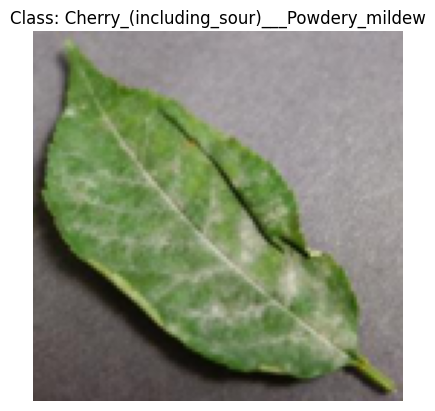

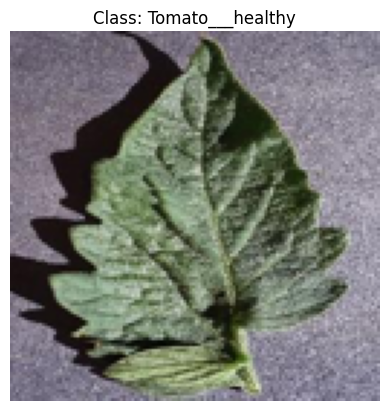

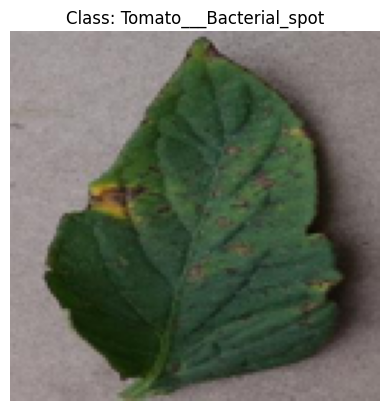

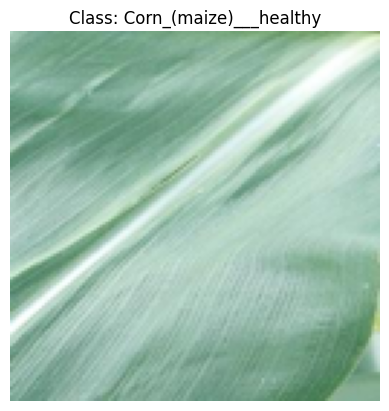

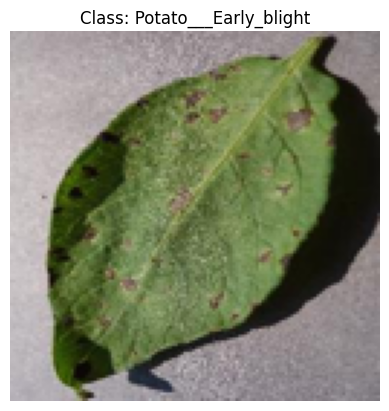

In [19]:
for batch_images, batch_labels in train_dataset.take(1):  # Take one batch
    print("Batch images shape:", batch_images.shape)
    print("Batch labels shape:", batch_labels.shape)

    for i in range(5):
        img = batch_images[i].numpy()
        img = (img * 255).astype("uint8")
        plt.imshow(img)
        # Flatten the label array before using inverse_transform
        class_label = label_encoder.inverse_transform(batch_labels[i].numpy().argmax(axis=0).reshape(-1))[0]
        plt.title(f"Class: {class_label}")
        plt.axis('off')
        plt.show()

In [20]:
import collections

def analyze_class_distribution(dataset):
    class_counts = collections.Counter()

    # Iterate over the dataset to count labels
    for _, batch_labels in dataset:
        # Convert batch_labels to numpy and flatten to ensure 1D
        labels = batch_labels.numpy().flatten()
        class_counts.update(labels)

    # Display the class distribution
    print("Class Distribution:")
    for label, count in class_counts.items():
        print(f"Class {label}: {count} samples")

# Analyze the augmented dataset
# analyze_class_distribution(train_dataset)

In [39]:
importlib.reload(model)
importlib.reload(image_preprocessing)

plant_cnn = model.plant_resnet(input_shape, 
                            num_classes, 
                            5,
                            dropout_rate=0.3)
plant_cnn.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_15 (Conv2D)             (None, 64, 64, 128)  18944       ['input_4[0][0]']                
                                                                                                  
 batch_normalization_11 (BatchN  (None, 64, 64, 128)  512        ['conv2d_15[0][0]']              
 ormalization)                                                                                    
                                                                                            

In [73]:
# Train the model
history = plant_cnn.fit(
    train_dataset,
    epochs=1,
    steps_per_epoch=(len(image_array) - len(val_images)) // batch_size,  # Train steps
    validation_data=val_dataset,
    validation_steps=len(val_images) // batch_size,                      # Validation steps
    verbose=1
)
plant_cnn.save("plant_cnn_model.h5")

1757/1757 [==============================] - 68s 38ms/step - loss: 0.0373 - accuracy: 0.9874 - val_loss: 0.6541 - val_accuracy: 0.8415


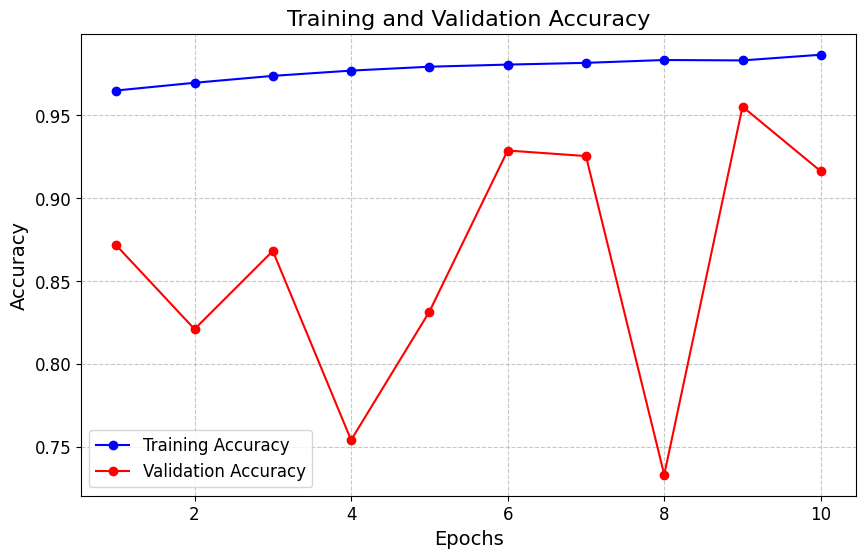

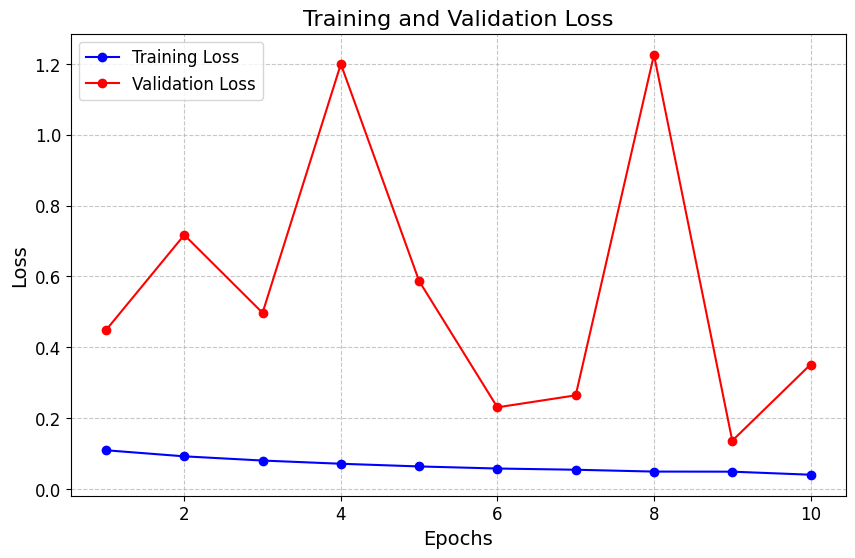

In [55]:
import matplotlib.pyplot as plt

# Extract metrics from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Define the number of epochs
epochs = range(1, len(acc) + 1)

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("Accuracy_Results.png")
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("Loss_Results.png")
plt.show()

### GAP Segmentation Extraction

In [56]:
def generate_heatmap(model, img, class_idx):
    # Get weights from the dense prediction layer (last layer, excluding biases)
    last_layer_weights = model.layers[-1].get_weights()[0]  # Dense prediction layer
    last_layer_weights_for_class = last_layer_weights[:, class_idx]  # Shape: (128,)

    # Extract the output of the last conv layer (dropout_10 in this case)
    last_conv_model = Model(model.input, model.layers[-3].output)
    last_conv_output = last_conv_model.predict(img[np.newaxis, :, :, :])  # Add batch dimension
    print(f"Shape of last_conv_output: {last_conv_output.shape}")

    # Squeeze to remove the batch dimension
    last_conv_output = np.squeeze(last_conv_output)  # Shape should now be (32, 32, 128)

    # Ensure the feature maps are 3D
    if len(last_conv_output.shape) != 3:
        raise ValueError(f"Expected 3D feature map, got shape: {last_conv_output.shape}")

    # Upsample the feature maps to match the input image dimensions
    h = img.shape[0] / last_conv_output.shape[0]
    w = img.shape[1] / last_conv_output.shape[1]
    upsampled_last_conv_output = scipy.ndimage.zoom(last_conv_output, (h, w, 1), order=1)

    # Multiply each feature map by the corresponding weight and sum along the depth axis
    # Reshape last_layer_weights_for_class to match the depth axis
    heat_map = np.dot(upsampled_last_conv_output, last_layer_weights_for_class[:last_conv_output.shape[-1]])

    # Normalize the heatmap for visualization
    heat_map = np.maximum(heat_map, 0)  # ReLU to remove negative values
    heat_map /= np.max(heat_map)  # Normalize to [0, 1]

    return heat_map

1/1 [==============================] - 0s 37ms/step
True Class: Peach___Bacterial_spot
Predicted Class: Tomato___Tomato_mosaic_virus
1/1 [==============================] - 0s 240ms/step
Shape of last_conv_output: (1, 32, 32, 128)


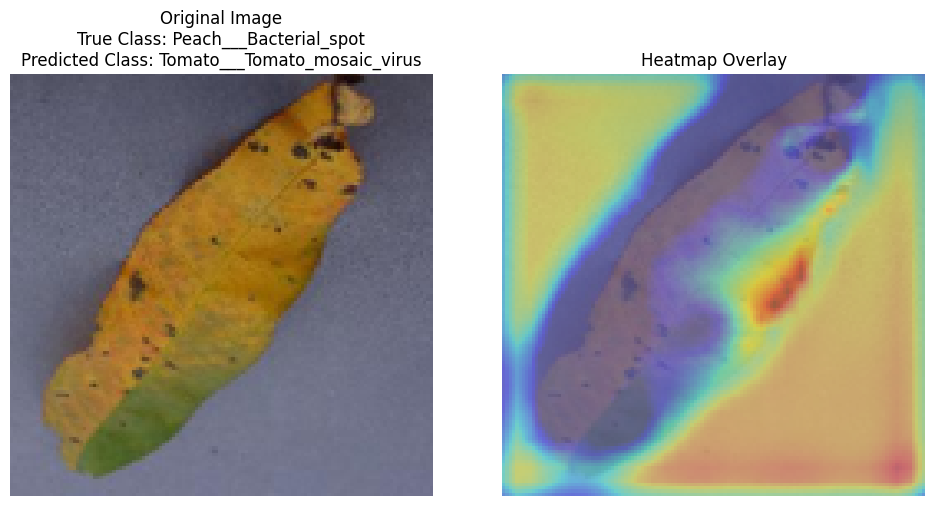

In [80]:
import random

# Example: Generate a heatmap for an image
random_img_idx = random.randint(0, len(val_images) - 1)
img = val_images[random_img_idx]

# Get the true class
true_class_idx = np.argmax(val_labels[random_img_idx])  # Get the true class index
true_class_label = label_encoder.inverse_transform([true_class_idx])[0]  # Decode the true class

# Predict the class for the image
predicted_class_idx = np.argmax(plant_cnn.predict(img[np.newaxis, :, :, :]))
predicted_class_label = label_encoder.inverse_transform([predicted_class_idx])[0]  # Decode predicted class

# Print real and predicted class
print(f"True Class: {true_class_label}")
print(f"Predicted Class: {predicted_class_label}")

# Generate the heatmap
heatmap = generate_heatmap(plant_cnn, img, predicted_class_idx)

# Plot the image and heatmap
plt.figure(figsize=(10, 5))

# Original image with true and predicted class
plt.subplot(1, 2, 1)
plt.title(f"Original Image\nTrue Class: {true_class_label}\nPredicted Class: {predicted_class_label}")
plt.imshow(img)
plt.axis('off')

# Heatmap overlay
plt.subplot(1, 2, 2)
plt.title("Heatmap Overlay")
plt.imshow(img, alpha=0.6)
plt.imshow(heatmap, cmap='jet', alpha=0.4)  # Heatmap overlay
plt.axis('off')
plt.tight_layout()
plt.show()